In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
Telecustomer= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
Telecustomer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
Telecustomer['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [5]:
replace_col = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies']


for i in replace_col:
    Telecustomer[i] = Telecustomer[i].replace({'No internet service' : 'No'})
    
Telecustomer['MultipleLines'].replace('No phone service', 'No', inplace=True) 

Telecustomer['TotalCharges'].replace(np.nan, 0, inplace=True)


Telecustomer["Churn"] = Telecustomer["Churn"].astype('category')
Telecustomer["Churn"] = Telecustomer["Churn"].cat.codes

In [6]:
print(Telecustomer.isnull().values.any())

False


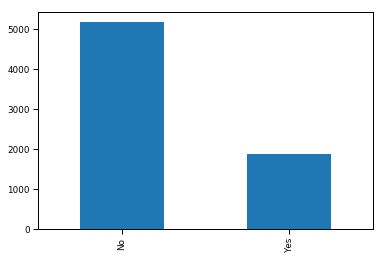

In [7]:
sns.set_context("paper", font_scale=1)
Telecustomer['Churn'].value_counts().plot(kind='bar')

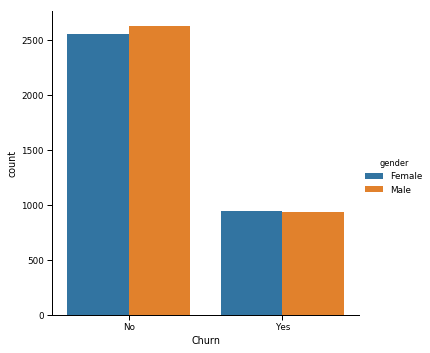

In [8]:
sns.catplot('Churn', hue='gender', kind='count', data=Telecustomer) # might have minor effect 

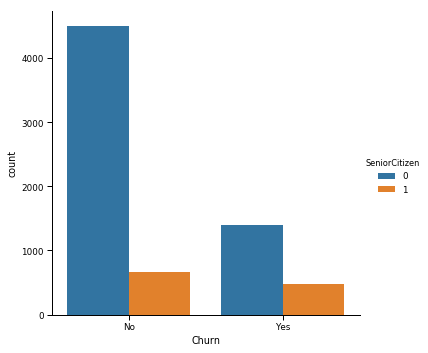

In [9]:
sns.catplot('Churn', hue='SeniorCitizen', kind='count', data=Telecustomer) # seems like no effect 

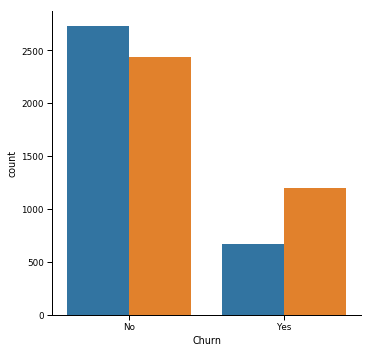

In [10]:
g= sns.catplot('Churn', hue='Partner', kind='count', data=Telecustomer)
g._legend.remove()# seems great effect

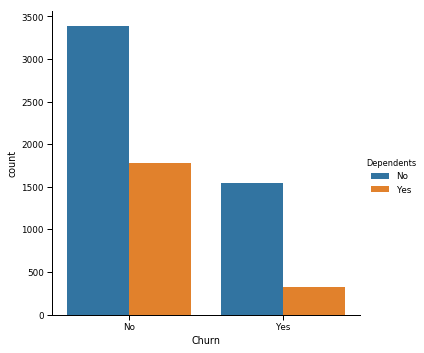

In [11]:
sns.catplot('Churn', hue='Dependents', kind='count', data=Telecustomer) # no effect

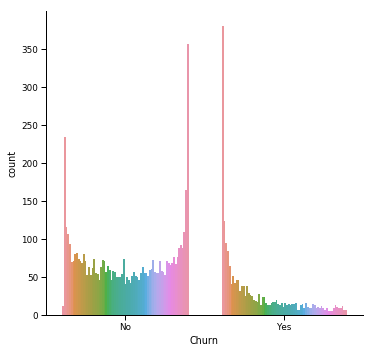

In [12]:
g = sns.catplot('Churn', hue='tenure', kind='count', data=Telecustomer)
g._legend.remove()

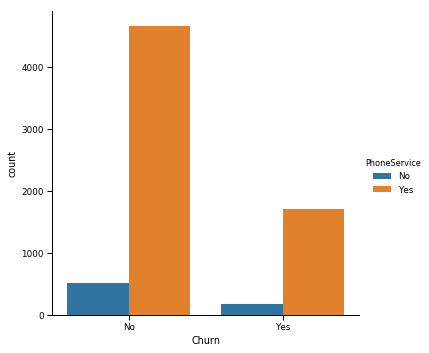

In [13]:
sns.catplot('Churn', hue='PhoneService', kind='count', data=Telecustomer) # not important

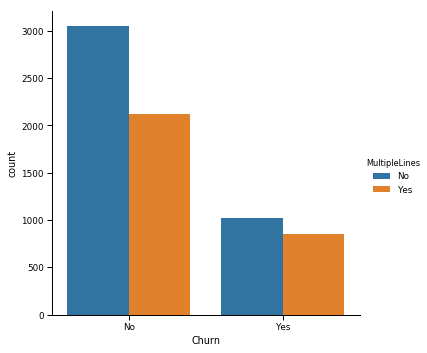

In [14]:
sns.catplot('Churn', hue='MultipleLines', kind='count', data=Telecustomer)#might be

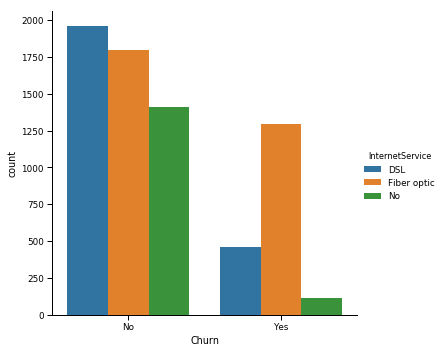

In [15]:
sns.catplot('Churn', hue='InternetService', kind='count', data=Telecustomer) #yes extremely

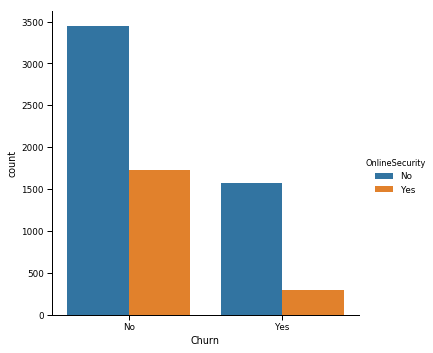

In [16]:
sns.catplot('Churn', hue='OnlineSecurity', kind='count', data=Telecustomer) #no

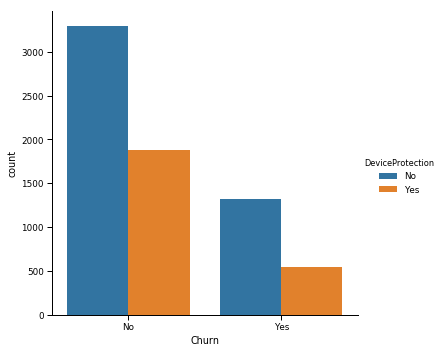

In [17]:
sns.catplot('Churn', hue='DeviceProtection', kind='count', data=Telecustomer) #might be

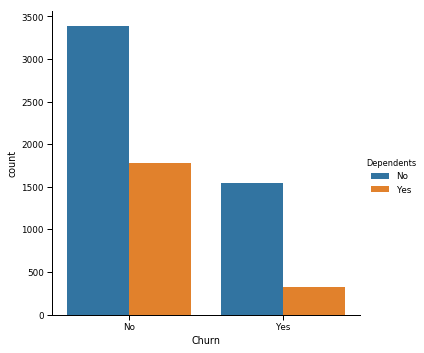

In [18]:
sns.catplot('Churn', hue='Dependents', kind='count', data=Telecustomer) #no

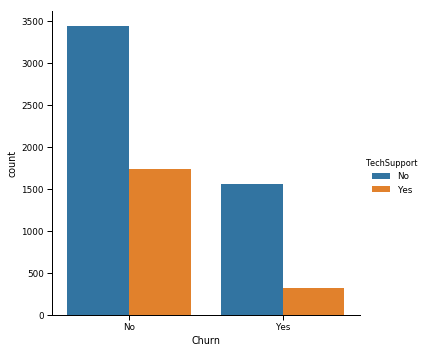

In [19]:
sns.catplot('Churn', hue='TechSupport', kind='count', data=Telecustomer) # no


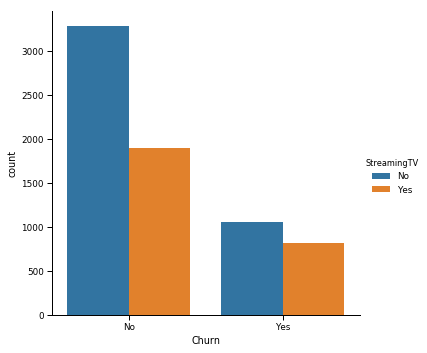

In [20]:
sns.catplot('Churn', hue='StreamingTV', kind='count', data=Telecustomer) # might be

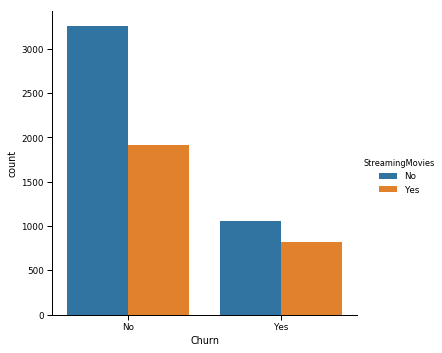

In [21]:
sns.catplot('Churn', hue='StreamingMovies', kind='count', data=Telecustomer) # might be 

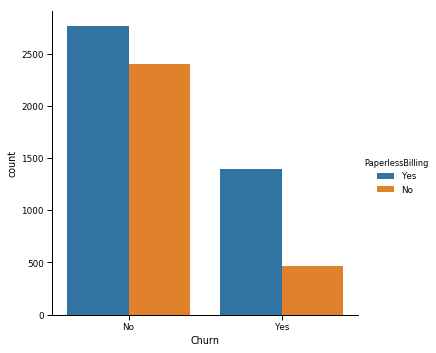

In [22]:
sns.catplot('Churn', hue='PaperlessBilling', kind='count', data=Telecustomer) # no

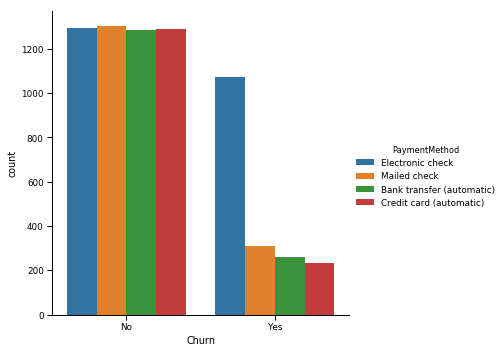

In [23]:
sns.catplot('Churn', hue='PaymentMethod', kind='count', data=Telecustomer) #yes might be 

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

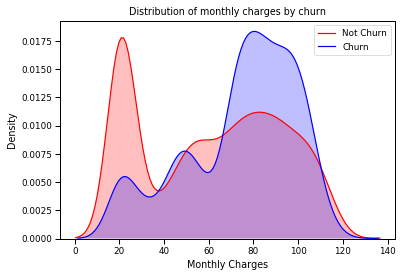

In [24]:
ax = sns.kdeplot(Telecustomer.MonthlyCharges[(Telecustomer["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(Telecustomer.MonthlyCharges[(Telecustomer["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

In [25]:
Telecustomer.TotalCharges = pd.to_numeric(Telecustomer.TotalCharges, errors='coerce')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 1.0, 'Distribution of total charges by churn')

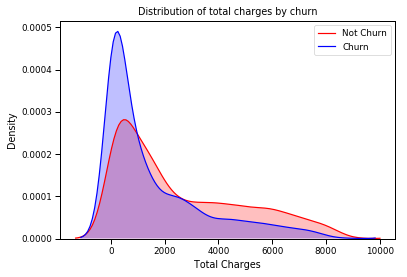

In [26]:

ax = sns.kdeplot(Telecustomer.TotalCharges[(Telecustomer["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(Telecustomer.TotalCharges[(Telecustomer["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

In [27]:
Telecustomer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
from sklearn.preprocessing import LabelEncoder # 카테고리 변수로 변환 해줌 
from sklearn.preprocessing import StandardScaler #평균이 0과 표준편차가 1이 되도록 변환 normal distribution

In [29]:
numvar = ['tenure', 'MonthlyCharges','TotalCharges']
binary = Telecustomer.drop(numvar, axis=1)
binary = binary.drop(['customerID'],axis=1)

In [30]:
label = LabelEncoder()
for i in binary:
    Telecustomer[i] = label.fit_transform(Telecustomer[i])

In [31]:
Telecustomer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,1,...,1,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,1,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,0,1,...,1,1,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


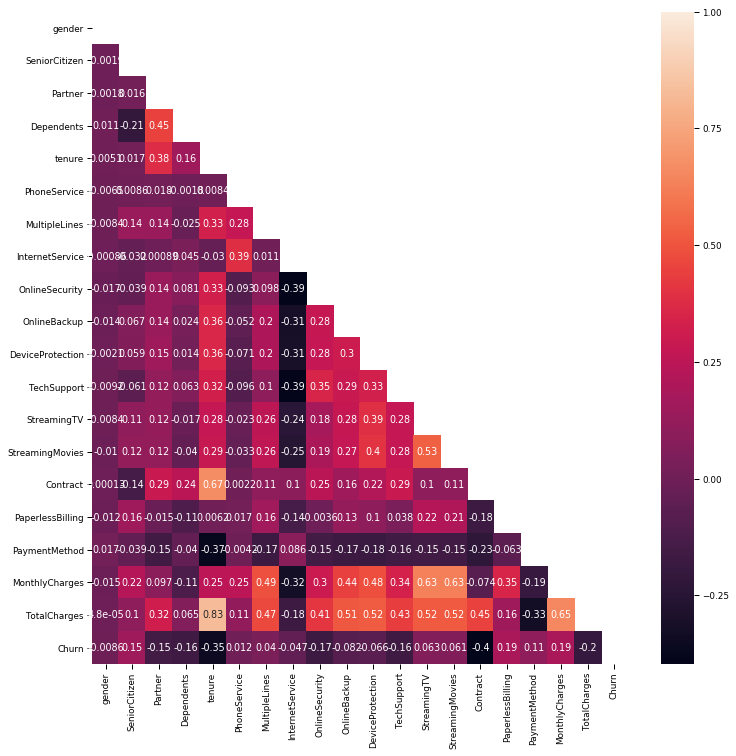

In [32]:
plt.figure(figsize= (12, 12))
mask = np.zeros_like(Telecustomer.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(Telecustomer.corr(), mask= mask , annot= True)
#according to correlation plot, it seems there is not much correlated feature with Churn 

In [33]:
Telecustomer['TotalCharges'].replace(np.nan, 0, inplace=True)

In [34]:
print(Telecustomer.isnull().values.any())

False


In [35]:
# 데이터 normalize 하기 위해, scaler 이용

Telecustomer['Churn']
std = StandardScaler()
scaled = std.fit_transform(Telecustomer[numvar])
scaled = pd.DataFrame(scaled, columns=numvar)

numvar

df= Telecustomer.copy()
df = df.drop(columns = numvar,axis = 1)
df = df.merge(scaled,left_index=True,right_index=True,how = "left")

df.head()

It is important to identify the features which has influences on target variable in contructing  lassifaction model. The good features is the feature that is highly correlated with target but not to each others.
According to the graph, the tenure is highly correlated with lots of features and contract as well
in order to consider the correlation within features, filter method, chi-squared test will be done in order to identify the feature .
Also the logistic regression feature seleciton to respect thier corresponding weight, the lasso regression will be used.


In [36]:
# test train data split
y = Telecustomer['Churn']
X = Telecustomer.drop(['Churn','customerID'],axis=1)


In [37]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


# chi-squared feature selection 

각 feature 사이의 correlation 을 이용한 feature selection 
두 변수사이의 correlation 이높을수록 변수를 drop 함


In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [39]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [40]:
np.set_printoptions(precision=3)
print(fit.scores_)


[2.587e-01 1.344e+02 8.241e+01 1.330e+02 1.628e+04 9.726e-02 6.549e+00
 9.821e+00 1.473e+02 3.122e+01 2.023e+01 1.356e+02 1.733e+01 1.624e+01
 1.116e+03 1.057e+02 5.849e+01 3.681e+03 6.243e+05]


In [41]:
features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[[1.000e+00 0.000e+00 2.985e+01 2.985e+01]
 [3.400e+01 1.000e+00 5.695e+01 1.890e+03]
 [2.000e+00 0.000e+00 5.385e+01 1.082e+02]
 [4.500e+01 1.000e+00 4.230e+01 1.841e+03]
 [2.000e+00 0.000e+00 7.070e+01 1.517e+02]]


 Chi- squred statistical test model: 
 
 TotalCharges > tenure > Monthly charges > contract > DeviceProtection > onlinesecurity > Online backup > Senior citizen > Dependents > Paperless billing
Not important : gender, partner, phoneservice, multiplelines, internetservice, streaming tv, streaming movies, 


# linear regression 을 이용한 feature selection
uses least squared estimate and finds coefficient that have smallest value of error, 

In [42]:
from sklearn.linear_model import Lasso
names = X.columns
names

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


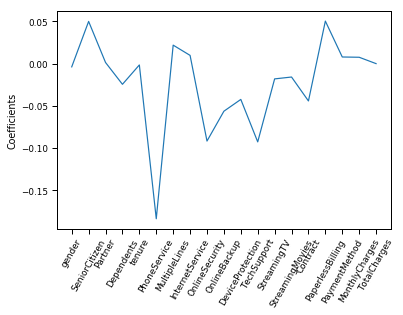

In [43]:
lasso = Lasso(alpha=0)
lasso_coef=lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation = 60)
_ = plt.ylabel('Coefficients')

In [44]:

lasso.fit(X,y)
train_score = lasso.score(X, y)
test_score = lasso.score(X, y)
coeff_used= np.sum(lasso.coef_!=0)
print("training score:", train_score)
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.2753300061171876
test score:  0.2753300061171876
number of features used:  19


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


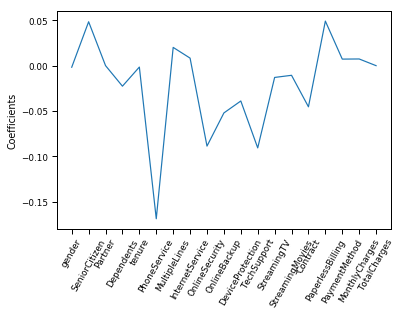

In [45]:
lasso = Lasso(alpha=0.0005)
lasso_coef=lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation = 60)
_ = plt.ylabel('Coefficients')

In [46]:

lasso.fit(X,y)
train_score = lasso.score(X, y)
test_score = lasso.score(X, y)
coeff_used= np.sum(lasso.coef_!=0)
print("training score:", train_score)
print("test score: ", test_score)
print("number of features used: ", coeff_used)


training score: 0.2752078058989045
test score:  0.2752078058989045
number of features used:  18


Lasso regression : 모든 19 개 feature 가 중요함 

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier



# RFE feature selection

 RFE (recursive feature elimination)는 Backward 방식중 하나로, 모든 변수를 우선 다 포함시킨 후 반복해서 학습을 진행하면서 중요도가 낮은 변수를 하나씩 제거하는 방식이다.

In [67]:
from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(model, 11)
fit = rfe.fit(X, y)
X_RFE = X[X.columns[fit.support_]]
X_RFE.columns


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Index(['SeniorCitizen', 'Dependents', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [68]:
# according to the chi-squared and Lasso regression, the feature that seems to be important are 

Index(['SeniorCitizen', 'Dependents', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [69]:
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.preprocessing import MinMaxScaler

In [70]:
colnames = X.columns

In [71]:
ranks={}

In [72]:

def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))


In [73]:
lr = LinearRegression(normalize=True)
lr.fit(X,y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [74]:
lr = LinearRegression(normalize=True)
lr.fit(X,y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)



In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)

rf.fit(X,y)

ranks["RF"] = ranking(rf.feature_importances_, colnames)


building tree 1 of 50building tree 2 of 50
building tree 3 of 50building tree 4 of 50

building tree 5 of 50
building tree 6 of 50building tree 7 of 50
building tree 8 of 50


building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50building tree 14 of 50

building tree 15 of 50
building tree 16 of 50
building tree 17 of 50building tree 18 of 50

building tree 19 of 50


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


building tree 20 of 50
building tree 21 of 50
building tree 22 of 50building tree 23 of 50

building tree 24 of 50
building tree 25 of 50
building tree 26 of 50building tree 27 of 50

building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


In [77]:
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))
    


	LinReg	RF	RFE	Ridge	Mean
gender	0.02	0.08	0.28	0.02	0.1
SeniorCitizen	0.27	0.06	0.89	0.28	0.38
Partner	0.01	0.06	0.06	0.01	0.03
Dependents	0.13	0.06	0.61	0.14	0.24
tenure	0.01	0.5	0.17	0.01	0.17
PhoneService	1.0	0.0	0.44	1.0	0.61
MultipleLines	0.12	0.04	0.5	0.12	0.2
InternetService	0.05	0.04	0.11	0.05	0.06
OnlineSecurity	0.5	0.05	0.83	0.51	0.47
OnlineBackup	0.31	0.05	0.56	0.31	0.31
DeviceProtection	0.23	0.04	0.33	0.23	0.21
TechSupport	0.5	0.05	0.72	0.51	0.44
StreamingTV	0.1	0.02	0.67	0.1	0.22
StreamingMovies	0.09	0.02	0.78	0.08	0.24
Contract	0.24	0.7	1.0	0.25	0.55
PaperlessBilling	0.27	0.08	0.94	0.28	0.39
PaymentMethod	0.04	0.17	0.39	0.04	0.16
MonthlyCharges	0.04	1.0	0.22	0.04	0.32
TotalCharges	0.0	0.81	0.0	0.0	0.2


In [78]:
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


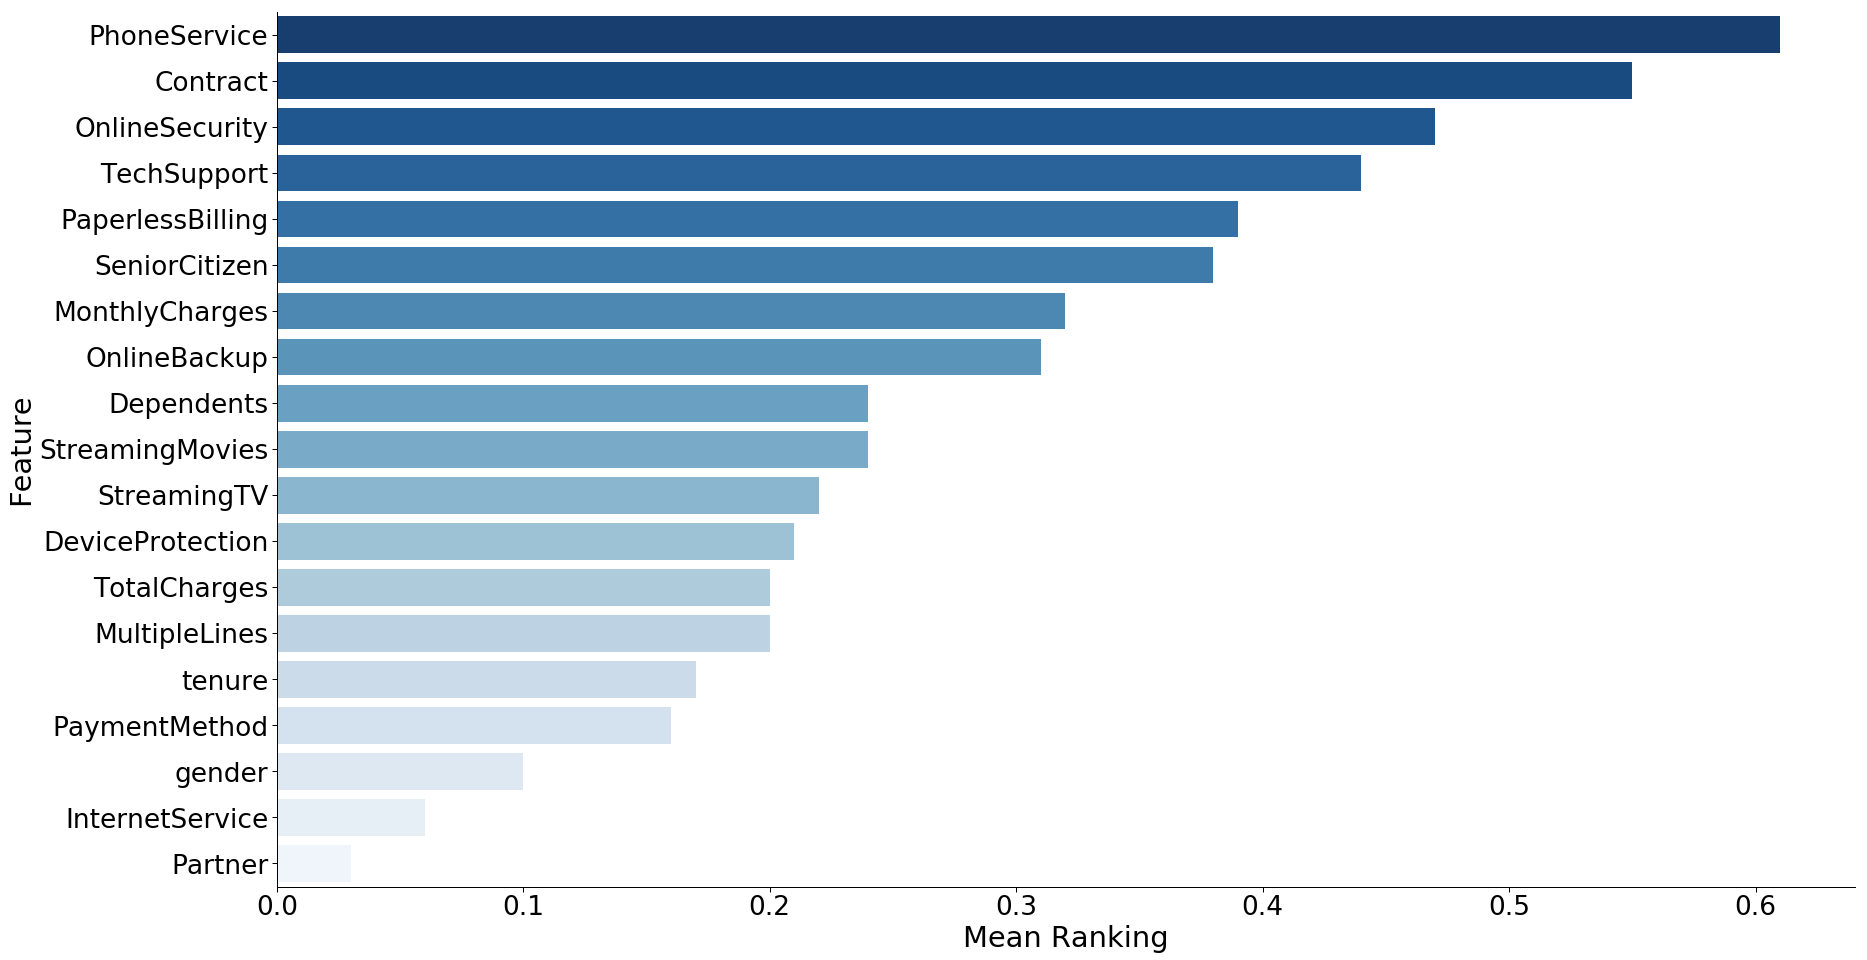

In [79]:
sns.set_context("paper", font_scale=3)
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=14, aspect=1.9, palette='Blues_r')

With following result, the feature 'Partner, InternetService, gender, PaymentMethod' which has below 0.1 will be elimiated

In [80]:
new_X= X.drop(['Partner','InternetService','gender','PaymentMethod'],axis=1)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(new_X,y, test_size=0.2, random_state= 40)

In [82]:
classifiers = [['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['LogisticRegression :', LogisticRegression()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB :', XGBClassifier()],
               ['CatBoost :', CatBoostClassifier(logging_level='Silent')]]


In [83]:
predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))

DecisionTree : 0.7239176721078779
RandomForest : 0.7608232789212207
Naive Bayes : 0.7104329311568488
KNeighbours : 0.7579843860894251


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM : 0.7686302342086586
LogisticRegression : 0.7913413768630234
AdaBoostClassifier : 0.7927608232789212


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GradientBoostingClassifier:  0.7934705464868701
XGB : 0.7991483321504613
CatBoost : 0.794889992902768
